# Задание 1

Имеется выборка наблюдений некоторой случайной величины:

[114.2, 114.0, 132.5, 141.8, 107.0, 126.9, 85.7, 149.6, 145.5, 130.7, 88.5, 111.8, 187.7, 102.2, 117.6, 113.5, 144.4, 104.4, 137.4, 149.8, 111.7, 121.9, 96.5, 138.7, 113.1, 126.0, 129.9, 138.5, 110.8, 129.4, 203.1, 124.1, 121.5, 126.9, 114.0, 128.0, 93.2, 116.6, 113.3, 122.9, 115.5, 78.7, 105.3, 113.2, 135.8, 121.1]

Требуется вычислить:
*   *среднее значение*
*   *медиану*
*   *выборочную дисперсию*
*   *межквартильный размах*



На основе анализа полученных значений и диаграммы *box-plot* сделать выводы о наличии аномальных наблюдений (выбросов).

После отбраковки аномальных наблюдений (исключения их из выборки) заново вычислить среднее значение и медиану.

Среднее значение: 122.93
Медиана: 121.30
Выборочная дисперсия: 514.28
Межквартильный размах (IQR): 19.93


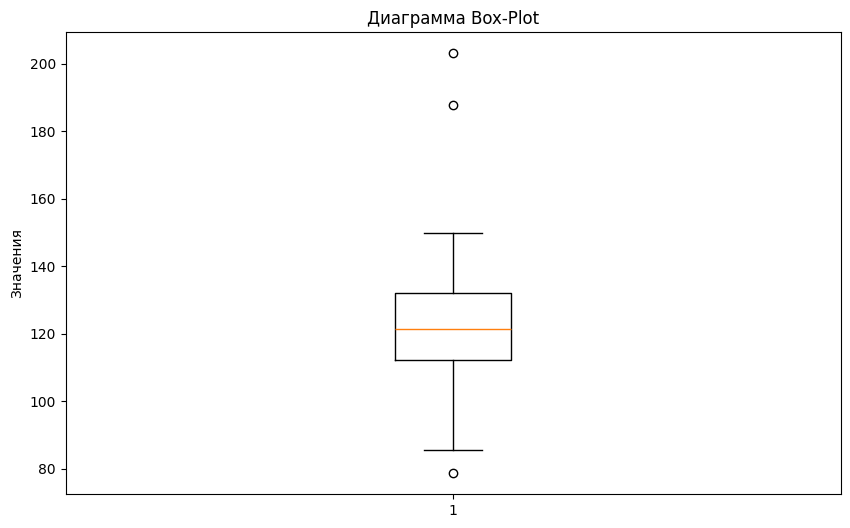


Среднее значение после удаления выбросов: 120.59
Медиана после удаления выбросов: 121.10


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Выборка наблюдений некоторой случайной величины
data = [114.2, 114.0, 132.5, 141.8, 107.0, 126.9, 85.7, 149.6, 145.5, 130.7,
        88.5, 111.8, 187.7, 102.2, 117.6, 113.5, 144.4, 104.4, 137.4, 149.8,
        111.7, 121.9, 96.5, 138.7, 113.1, 126.0, 129.9, 138.5, 110.8, 129.4,
        203.1, 124.1, 121.5, 126.9, 114.0, 128.0, 93.2, 116.6, 113.3, 122.9,
        115.5, 78.7, 105.3, 113.2, 135.8, 121.1]
data = np.array(data)

# Среднее значение
mean = np.mean(data)
# Медиана
median = np.median(data)
# Выборочная дисперсия
variance = np.var(data, ddof=1)
# Межквартильный диапазон
q3, q1 = np.percentile(data, [75, 25])
iqr = q3 - q1

print(f"Среднее значение: {mean:.2f}")
print(f"Медиана: {median:.2f}")
print(f"Выборочная дисперсия: {variance:.2f}")
print(f"Межквартильный размах (IQR): {iqr:.2f}")

# Построение boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.title('Диаграмма Box-Plot')
plt.ylabel('Значения')
plt.show()

# нижняя граница выбросов
lower = q1 - 1.5 * iqr
# верхняя граница выбросов
upper = q3 + 1.5 * iqr
# Исключение выбросов из данных
processedData = data[(data >= lower) & (data <= upper)]

# Cреднее значение (после исключения выбросов)
processedDataMean = np.mean(processedData)
# Медиана (после исключения выбросов)
processedDataMedian = np.median(processedData)

print(f"\nСреднее значение после удаления выбросов: {processedDataMean:.2f}")
print(f"Медиана после удаления выбросов: {processedDataMedian:.2f}")


# Задание 2

Из *300* абитуриентов, поступивших в институт, *97* человек имели пятерку в школе и *48* получили пятерку на вступительных экзаменах по тому же предмету,причем только *18* человек имели пятерку и вшколе, и на экзамене. С уровнем значимости *0.05* проверить гипотезу о независимости оценок *5* в школе и на вступительном экзамене.

**Решение**
---

Из условия задачи известно следующее:<br>
*   Всего абитуриентов поступивших в институт: *300*
*   Студенты имеющие пятерку в школе: *97*
*   Студенты получившие пятерку на экзамене: *48*
*   Студенты получившие пятерку в школе и на экзамене: *18*
*   Уровень значимости: *0.05*

Из имеющихся данных вычислим дополнительные значения:<br>
*   Студенты получившие пятерку только в школе: *79*
*   Студенты получившие пятерку только на экзамене: *30*
*   #Студенты не получившие пятерку на экзамене и в школе: *191*



Из полученных результатов построим таблицу сопряженности (она же - *таблица контингентности*)

![solution4_1_2.png](https://drive.google.com/uc?export=view&id=11tdfBdWI0vODHL2HSvaYYyTJWmgVjvfq)

Сделаем следующие выводы (исходя из таблицы):<br>
*   Из 97 отличников в школе, на экзамене получили пятерку 18 человек.
*   Из 97 отличников в школе, на экзамене не получили пятерку 79 человек.
*   Из 203 не отличников в школе, на экзамене получили пятерку 30 человек.
*   Из 203 не отличников в школе, на экзамене не получили пятерку 173 человек.
*   Всего получили пятерку на экзамене 48 человек.
*   Всего не получили пятерку на экзамене 252 человек.



Вычислим значения статистики *хи-квадрат*, *p - значения*, *степень свободы*:<br>
*   Значение статистики хи-квадрат: *0.44*
*   Значение p-value: *0.5050*
*   Значение степени свободы: *1*

**Сравнив с уровнем значимости, можно сделать вывод, что оценки не являются зависимыми.**

In [2]:
import numpy as np
from scipy.stats import chi2_contingency

# Всего абитуриентов поступивших в институт
totalSnts = 300
# Студенты имеющие пятерку в школе
sntsHave5Sc = 97
# Студенты получившие пятерку на экзамене
sntsHave5Ex = 48
# Студенты получившие пятерку в школе и на экзамене
sntsHave5ExAndSc = 18

# Студенты получившие пятерку только в школе
sntsHave5OfOnlySchool = sntsHave5Sc - sntsHave5ExAndSc
# Студенты получившие пятерку только на экзамене
sntsHave5OfOnlyEx = sntsHave5Ex - sntsHave5ExAndSc
# Студенты не получившие пятерку на экзамене и в школе
sntsNotHave5ExAndSc = totalSnts - (sntsHave5Sc + sntsHave5OfOnlyEx)

# Построение таблицы сопряженности
contingencyTable = np.array([
    [sntsHave5ExAndSc, sntsHave5OfOnlyEx],
    [sntsHave5OfOnlySchool, sntsNotHave5ExAndSc]
])

print(f"Таблица сопряженности:\n{contingencyTable}\n")

# Вычисление значения статистики хи-квадрат, p-значения, степень свободы и ожидаемой частоты
statistic, pValue, dof, expectedFreq = chi2_contingency(contingencyTable)

print(f"Значение статистики хи-квадрат: {statistic:.2f}")
print(f"Значение p-value: {pValue:.4f}")
print(f"Значение степени свободы: {dof}")
print(f"Значение ожидаемой частоты:\n {expectedFreq}")

# Уровень значимости (альфа-уровень)
significanceLevel = 0.05

if pValue < significanceLevel:
    print("\nОценки являются зависимыми.")
else:
    print("\nОценки не являются зависимыми.")


Таблица сопряженности:
[[ 18  30]
 [ 79 173]]

Значение статистики хи-квадрат: 0.44
Значение p-value: 0.5050
Значение степени свободы: 1
Значение ожидаемой частоты:
 [[ 15.52  32.48]
 [ 81.48 170.52]]

Оценки не являются зависимыми.


# Задание 3

Мука расфасовывается в пакетытак, чтобы вес одного пакета был 10кг. В результате измерения веса 20 случайно выбранных пакетов получены измерения:
[9.473, 10.016, 9.703, 10.306, 10.102, 10.002, 9.655, 10.077, 10.084, 9.775, 10.225, 9.861, 9.887, 9.964, 9.974, 10.132, 10.182, 9.788, 10.225, 9.757]



1.   Вычислить оценки максимального правдоподобия параметров нормального распределения
2.   Проверить гипотезу о нормальном распределении измерений
3.   Изобразить на одной диаграмме график эмпирической функции распределения по выборке и график функции нормального распределения с полученными оценками параметров.

Размерность данных: 20
Максимальное значение: 10.306
Минимальное значение: 9.473
Среднее значение оценки максимального правдоподобия: 9.9594
Стандартное отклонение оценки максимального правдоподобия: 0.2133
Данные распределены нормально (вероятнее всего)


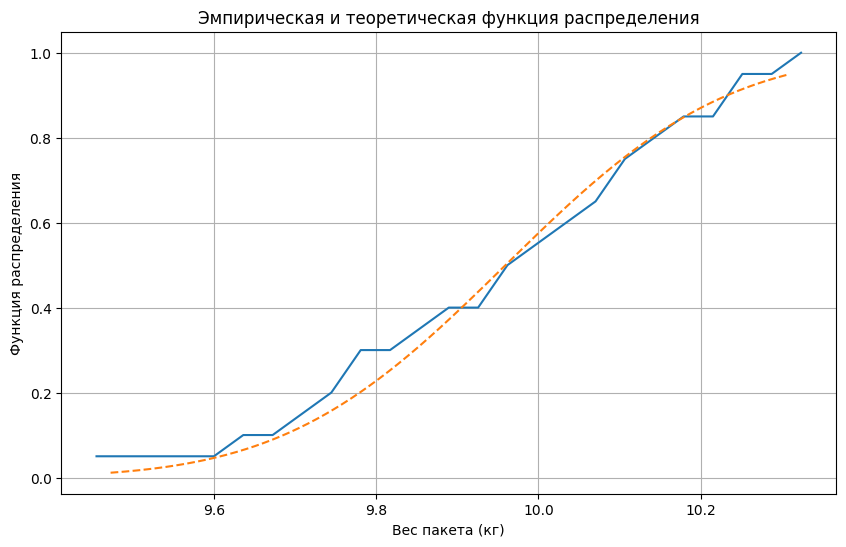

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import cumfreq
from scipy.stats import norm

# 20 случайно выбранных пакетов (кг)
data = [9.473, 10.016, 9.703, 10.306, 10.102, 10.002, 9.655, 10.077,
        10.084, 9.775, 10.225, 9.861, 9.887, 9.964, 9.974, 10.132,
        10.182, 9.788, 10.225, 9.757]

# Размерность
sizeOfData = np.size(data)
# Максимальное значение
maxValue = np.max(data)
# Минимальное значение
minValue = np.min(data)
# Среднее значение
mleMean = np.mean(data)
# Стандартное отклонение
mleStd = np.std(data)
# Уровень значимости (альфа-уровень)
significanceLevel = 0.05

print(f"Размерность данных: {sizeOfData}")
print(f"Максимальное значение: {maxValue}")
print(f"Минимальное значение: {minValue}")
print(f"Среднее значение оценки максимального правдоподобия: {mleMean:.4f}")
print(f"Стандартное отклонение оценки максимального правдоподобия: {mleStd:.4f}")

# Отличается ли заданное значение выборки от нормального распределения набора данных.
statistic, pValue = normaltest(data)

if pValue < significanceLevel:
    print("Данные не распределены нормально")
else:
    print("Данные распределены нормально (вероятнее всего)")

# Вычисление гистограммы кумулятивной частоты
cumulativeFreq = cumfreq(data, numbins=25)
# Вычисление значений для оси x
x = cumulativeFreq.lowerlimit + np.linspace(0, cumulativeFreq.binsize * cumulativeFreq.cumcount.size,
                                            cumulativeFreq.cumcount.size)

# Генерация значения для оси x нормального распределения
xNormal = np.linspace(minValue, maxValue, 1000)
# Функция нормального распределения
cdfNormal = norm.cdf(xNormal, loc=mleMean, scale=mleStd)

plt.figure(figsize=(10, 6))
plt.plot(x, cumulativeFreq.cumcount / sizeOfData, label='Эмпирическое распределение')
plt.plot(xNormal, cdfNormal, label='Нормальное распределение', linestyle='--')
plt.xlabel('Вес пакета (кг)')
plt.ylabel('Функция распределения')
plt.title('Эмпирическая и теоретическая функция распределения')
plt.grid(True)
plt.show()